In [1]:
from IFD_tsne import *
from utils import load_data, MidpointNormalize, equipotential_standard_normal, plot_heatmaps
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from tueplots import figsizes, fonts, bundles
from tueplots import cycler
from tueplots.constants import markers
from tueplots.constants.color import palettes
import tsne_jax

# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 150})
#from jax.config import config
#config.update("jax_enable_x64", True)

# Laplace Approximation tsne 

In [12]:
X, y = make_blobs(n_samples=50, n_features=50, centers=4, random_state=0, shuffle=False, cluster_std=3)
X, y = load_data(50)
key = random.PRNGKey(42)
#X = onp.array(random.normal(key, shape=(50, 50)))
y_guess = random.normal(key, shape=(X.shape[0], 2))
Y_star = tsne_fwd(X, y_guess)

===> Finding 49 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds


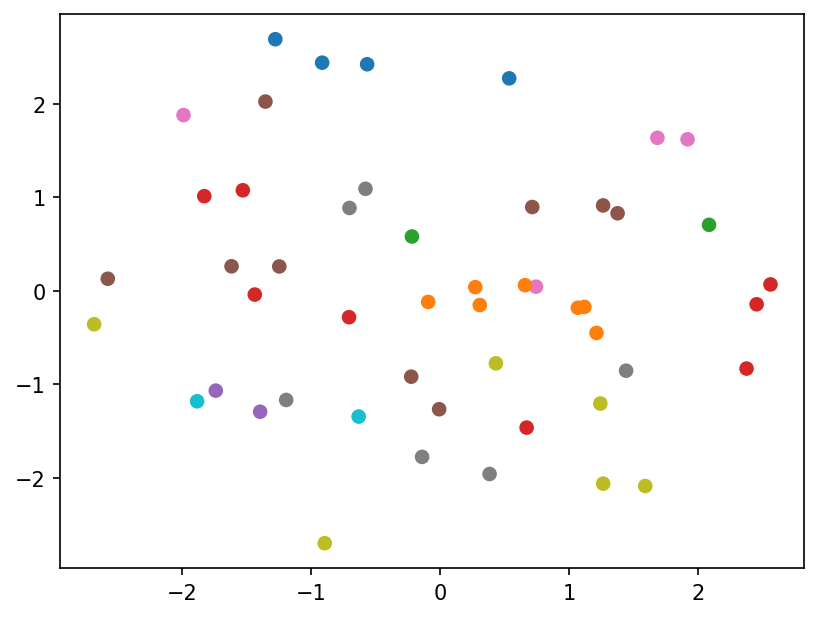

In [13]:
plt.scatter(Y_star[:, 0], Y_star[:, 1], c=y, cmap='tab10')

In [14]:
dy, H, J = d_y_star_d_x_outer(KL_divergence_log, X, Y_star)

Computing pairwise distances...
Starting binary search
Entered binary search function
Computing pairwise distances...
Starting binary search
Entered binary search function


In [15]:
print('Rank of Hessian ', np.linalg.matrix_rank(H)) 

Rank of Hessian  100


In [16]:
print('Determinant of Hessian', np.linalg.det(H))

Determinant of Hessian 0.0


In [17]:
H = H+1e-6*np.eye(len(H))

In [18]:
H_inv = np.linalg.pinv(H)
S = equipotential_standard_normal(2 * X.shape[0], 20)

/Users/zabel/projects/tsne/utils.py:82: RuntimeWarning: invalid value encountered in divide
  M = np.dot(mu, np.expand_dims(np.cos(theta), axis=0)) + E * np.sin(theta) / theta


In [31]:
S = equipotential_standard_normal(2 * X.shape[0], 20)
# A=L*L'
# L*L'*A_inv = eye(n,n)
# Substitute u = L'*A_inv
# Solve problem L*u = eye(n,n)
# u is known now, so solve second problem L'*A_inv = u
L, lower = jax.scipy.linalg.cho_factor(H, lower=True)
u = jax.scipy.linalg.solve_triangular(L, np.eye(np.shape(L)[0]), lower=True)
L_t, lower = jax.scipy.linalg.cho_factor(H, lower=False)
H_inv = jax.scipy.linalg.solve_triangular(L_t, u, lower=False)

/mnt/qb/work/coe/szabel09/src/tsne/utils.py:82: RuntimeWarning: invalid value encountered in true_divide
  M = np.dot(mu, np.expand_dims(np.cos(theta), axis=0)) + E * np.sin(theta) / theta


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

[ 2.61686340e+02  2.28525665e+02  1.59310577e+02  1.37786636e+02
  1.05078606e+02  7.24703598e+01  6.31474457e+01  4.94519424e+01
  4.48460159e+01  4.07519531e+01  3.76178246e+01  3.44599152e+01
  3.12648754e+01  3.01066990e+01  2.76921444e+01  2.65686283e+01
  2.61661930e+01  2.42480202e+01  2.35217457e+01  2.28925610e+01
  2.22845860e+01  2.08431492e+01  2.01225052e+01  1.89957371e+01
  1.87469120e+01  1.78697433e+01  1.77600727e+01  1.72362938e+01
  1.68229599e+01  1.65737782e+01  1.56459846e+01  1.55764570e+01
  1.49016638e+01  1.47159195e+01  1.44317274e+01  1.39883747e+01
  1.37833977e+01  1.35361433e+01  1.34233370e+01  1.31354675e+01
  1.30678616e+01  1.28633680e+01  1.26063032e+01  1.24808207e+01
  1.23002443e+01  1.21278229e+01  1.20521193e+01  1.18474236e+01
  1.17568169e+01  1.16904354e+01  1.13127012e+01  1.11686687e+01
  1.10076180e+01  1.08697348e+01  1.08069878e+01  1.04914637e+01
  1.04423027e+01  1.03316965e+01  1.01900034e+01  1.00691271e+01
  1.00440416e+01  9.96699

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

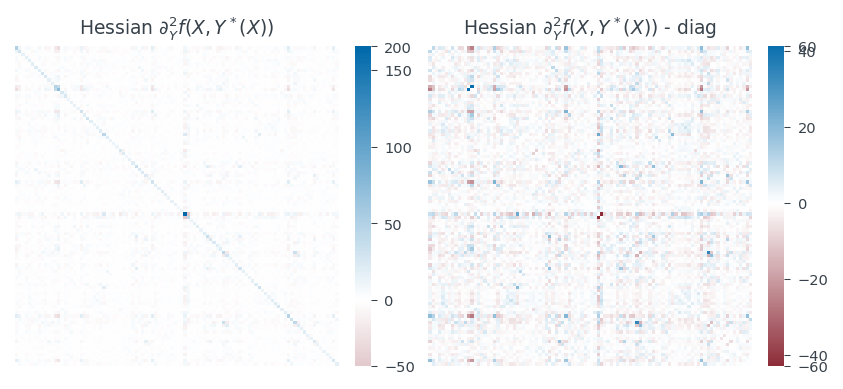

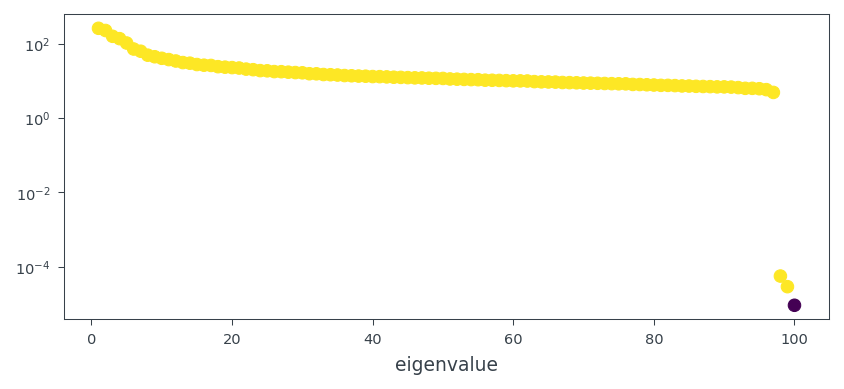

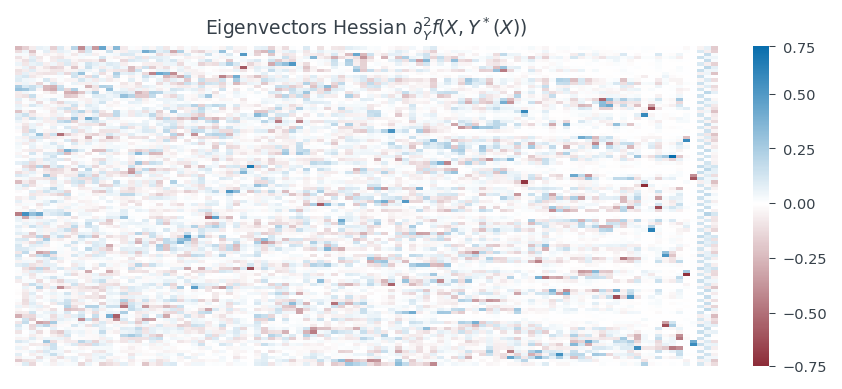

In [19]:
plot_heatmaps(None, H_inv, None)

In [22]:
L, lower = jax.scipy.linalg.cho_factor(H_inv+1e-4*np.eye(len(H_inv)), lower=True)

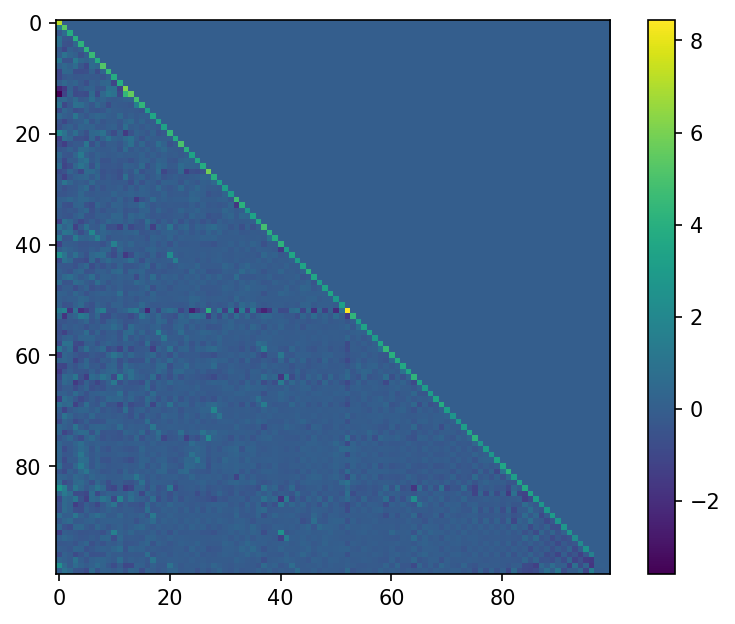

In [23]:
plt.imshow(L)
plt.colorbar()

In [27]:
Y_star_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_star_flat)
np.save('laplace_approximation/samples.npy', samples)
np.save('laplace_approximation/labels.npy', y)
np.save('laplace_approximation/mean.npy', Y_star)

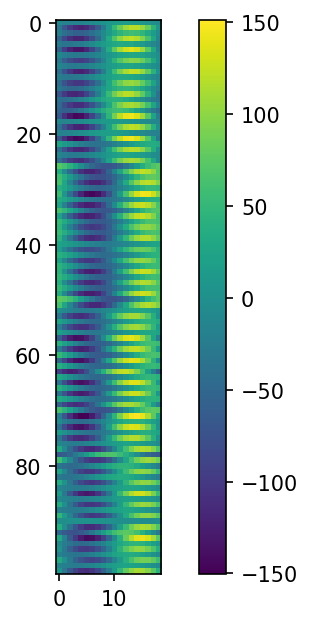

In [15]:
plt.imshow(np.dot(L, S))
plt.colorbar()

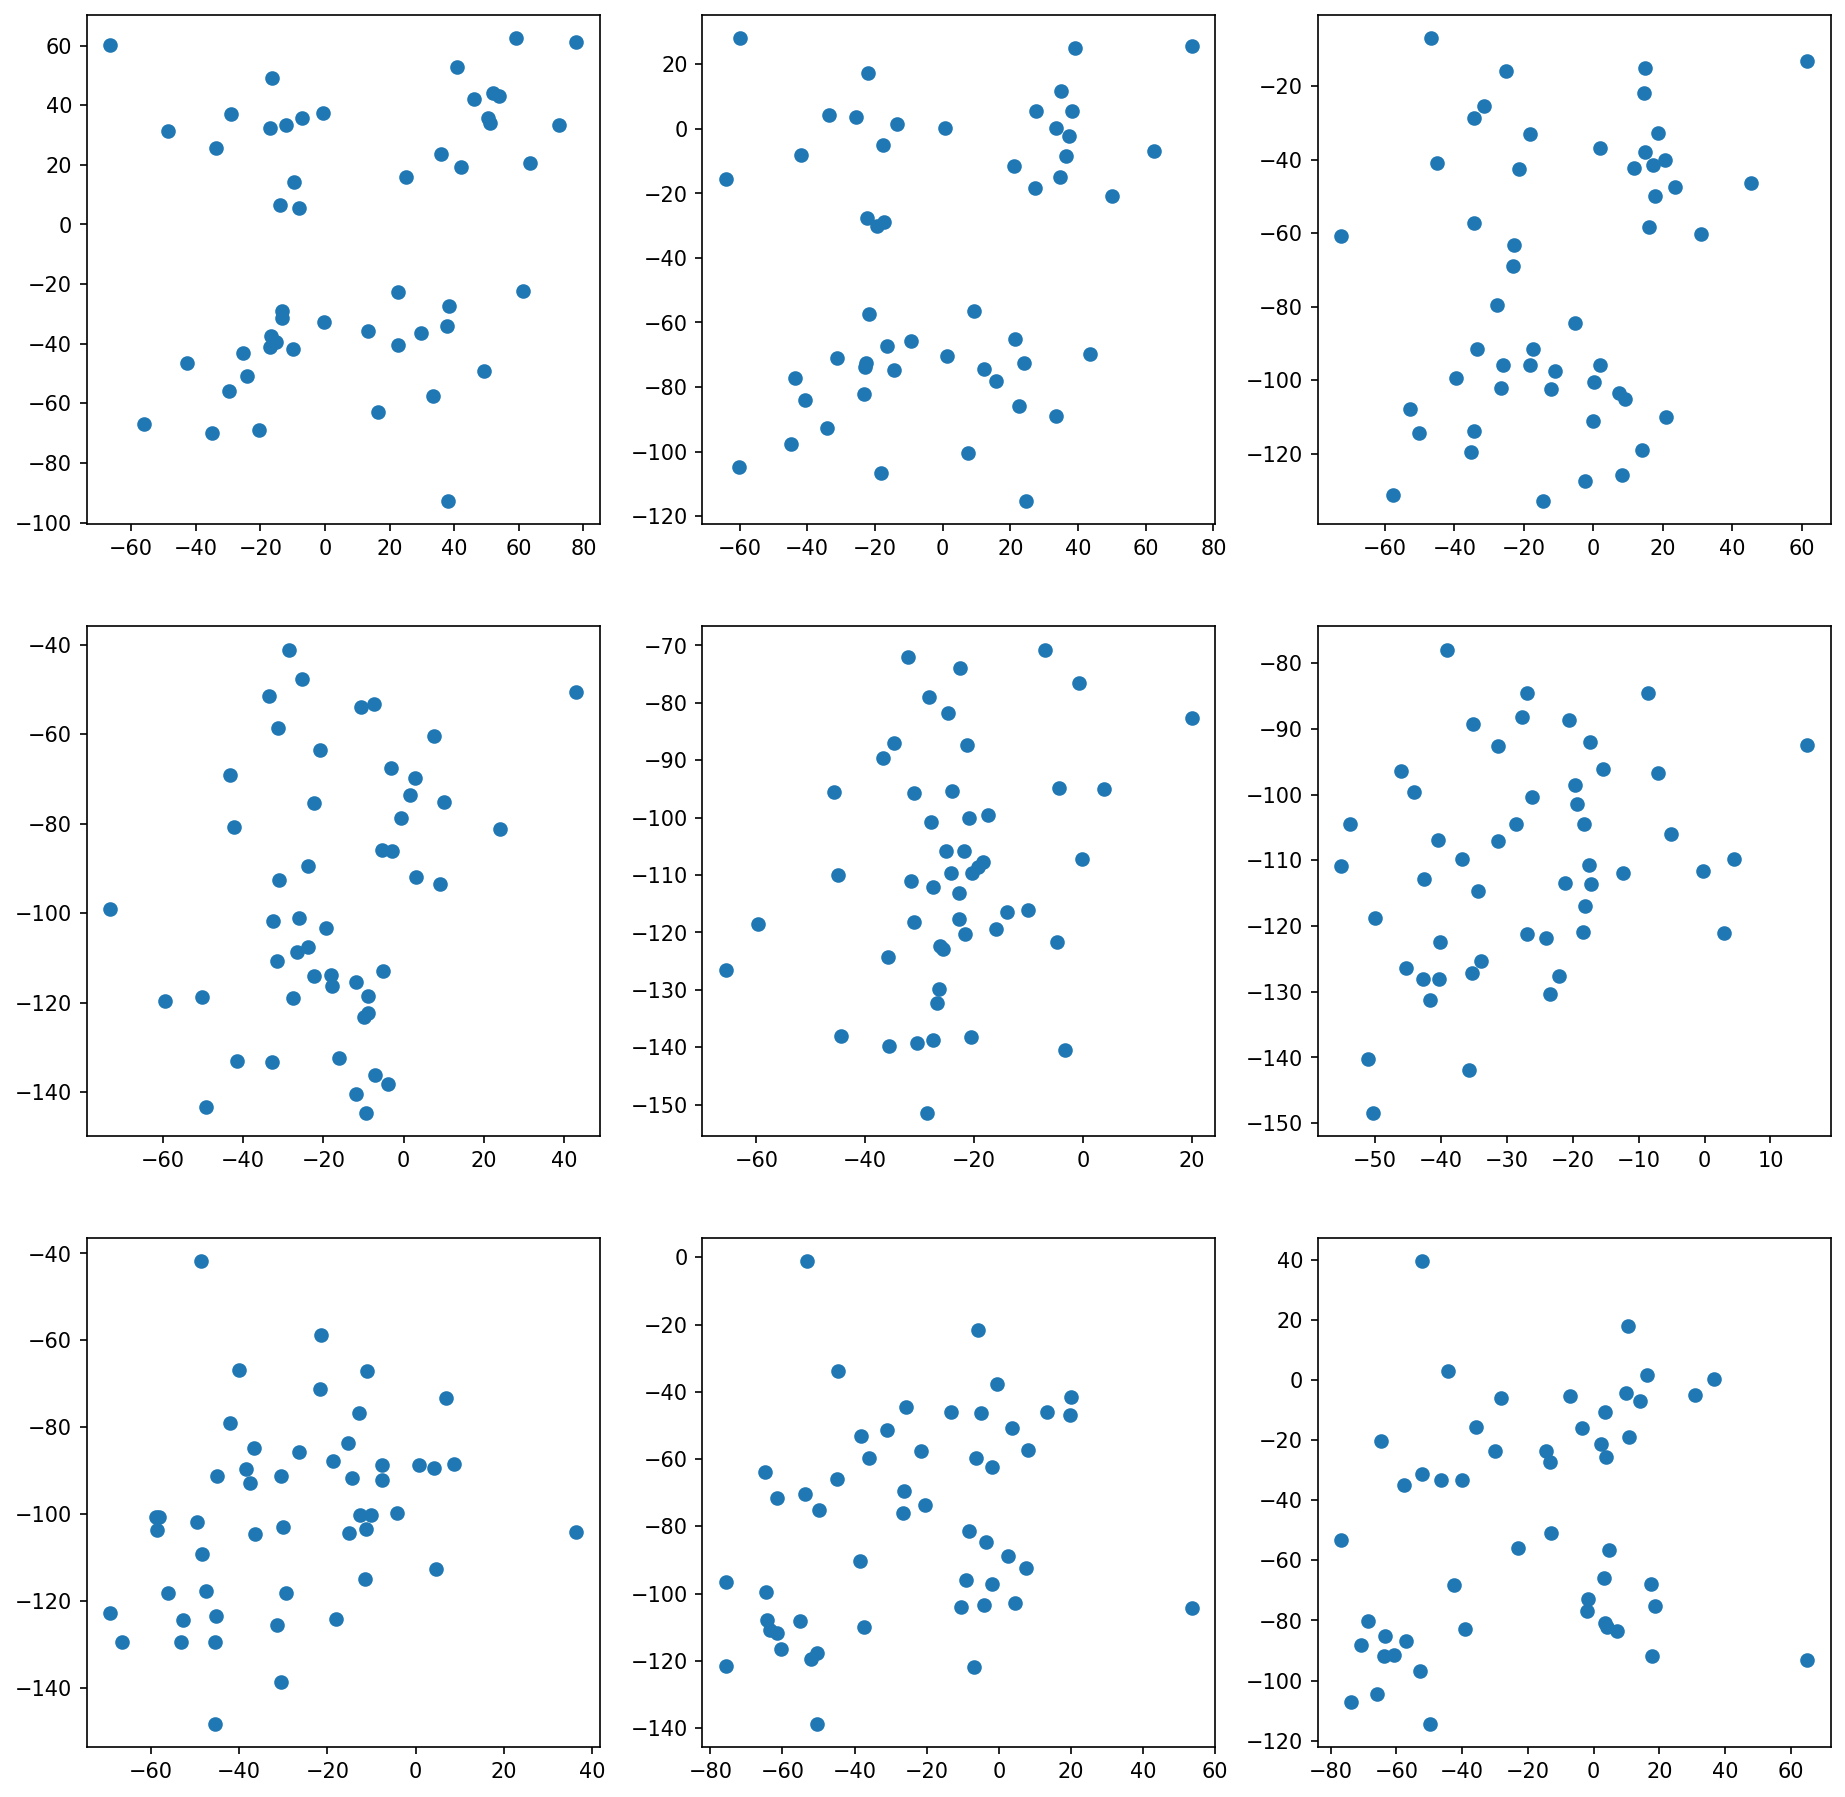

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i, ax in zip(np.transpose(samples), axs.ravel()):
    Y_sample = Y_unflattener(i)
    ax.scatter(Y_sample[:, 0], Y_sample[:, 1])

In [ ]:
with plt.rc_context(bundles.beamer_moml()):
    fig, ax1 = plt.subplots()
    sns.heatmap(H_inv, cmap='bwr', norm=(MidpointNormalize(midpoint=0, vmin=onp.min(H_inv), vmax=onp.max(H_inv))), ax=ax1)
    ax1.set_title('Hessian $\partial_Y^2 f(X, Y^*(X))$')
    ax1.tick_params(bottom=False, left=False)
    ax1.set(xticklabels=[], yticklabels=[])